<a href="https://colab.research.google.com/github/4SaferVC/SaferRepo/blob/master/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [215]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [216]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [217]:
# read the data
!ls /content/drive/MyDrive/FoodHub_Project/
df = pd.read_csv('/content/drive/MyDrive/FoodHub_Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

foodhub_order.csv  PYF_Project_LearnerNotebook_FullCode.ipynb


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [218]:
# Write your code here
total_rows = df.shape[0]
total_columns = df.shape[1]

print(f"Number of rows: {total_rows}")
print(f"Number of columns: {total_columns}")

Number of rows: 1898
Number of columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [219]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [220]:
# Write your code here
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [221]:
# Write your code here

min_prep_time = df["food_preparation_time"].min()
avg_prep_time = round(df["food_preparation_time"].mean(),2)
max_prep_time = df["food_preparation_time"].max()

print(f"Minimum food preparation time: {min_prep_time}")
print(f"Average food preparation time: {avg_prep_time}")
print(f"Maximum food preparation time: {max_prep_time}")


Minimum food preparation time: 20
Average food preparation time: 27.37
Maximum food preparation time: 35


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [222]:
# Write the code here
No_Rating = df[df["rating"] == "Not given"].shape[0]
print(f"No ratings for {No_Rating} orders" )

No ratings for 736 orders


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

The number of unique orders is: 1898
There are 1200 unique customers.


<Axes: xlabel='customer_id', ylabel='count'>

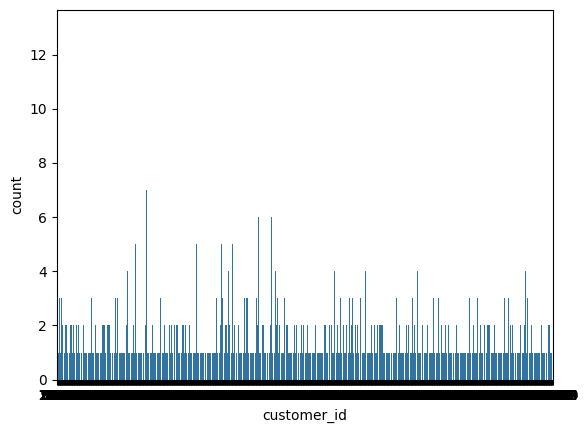

In [223]:
# Write the code here
# Get the number of unique order IDs
unique_orders = df["order_id"].nunique()

print(f"The number of unique orders is: {unique_orders}")

# Number of unique customers
unique_customers = df["customer_id"].nunique()

# Print the observation
print(f"There are {unique_customers} unique customers.")

# Plot the distribution of customers
sns.countplot(x="customer_id", data=df)
#sns.histplot(x="customer_id",data=df)


<Axes: xlabel='cost_of_the_order', ylabel='Count'>

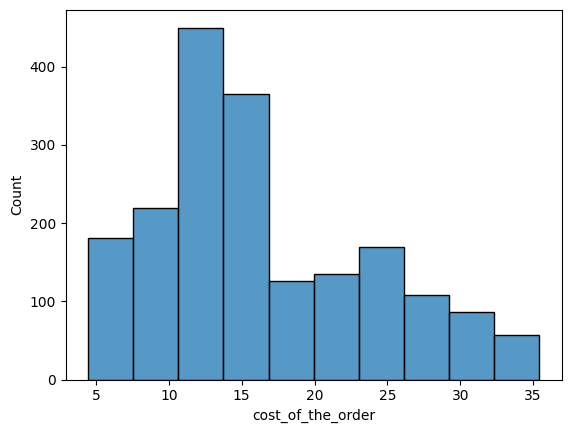

In [224]:


# Create a histogram plot of the order cost and their frequency
sns.histplot(x="cost_of_the_order", bins=10, data=df)

<ipython-input-225-be27010553ae>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["total_orders"] = df.groupby("restaurant_name")["restaurant_id"].transform("count")


<Axes: xlabel='restaurant_name', ylabel='total_orders'>

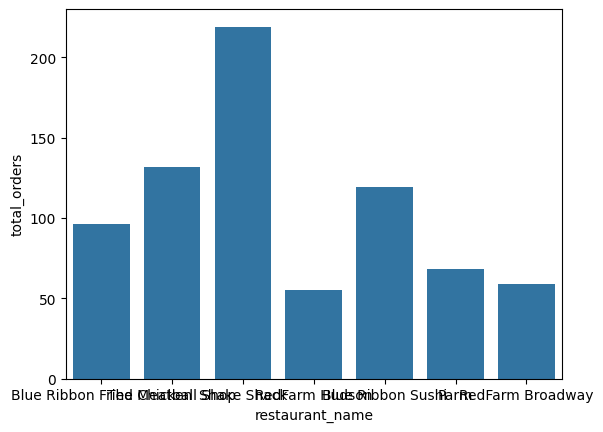

In [225]:
# Get the for restaurants with more than 50 orders
# Count the number of orders for each restaurant
restaurant_counts = df["restaurant_name"].value_counts()

# Create a new column restaurant_id for each restaurant
grouped_df = df.groupby("restaurant_name")

df["restaurant_id"] = pd.Series(df.index).unique()
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)
#print(df)
# Filter restaurants with more than 50 order
restaurants_with_more_than_50_order = restaurant_counts[restaurant_counts > 50].index.tolist()

# Filter the DataFrame to include only those restaurants
df_filtered = df[df["restaurant_name"].isin(restaurants_with_more_than_50_order)]
df_filtered["total_orders"] = df.groupby("restaurant_name")["restaurant_id"].transform("count")

# Plot the bar chart
sns.barplot(x="restaurant_name", y="total_orders", data=df_filtered)

The number of cuisine types are:  {14}


<Axes: xlabel='cuisine_type', ylabel='count'>

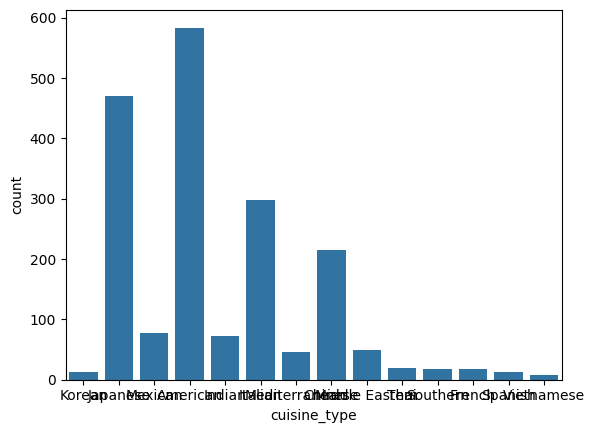

In [226]:
# popular cuisine types - ordered most times

cuisine = df["cuisine_type"].nunique()

print("The number of cuisine types are: ", {cuisine})

# Plot the distribution of cuisine
sns.countplot(x="cuisine_type", data=df)


day_of_the_week
Weekend    71.18019
Weekday    28.81981
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x793a2b1c6b00>,
 [Text(-0.679107125435181, 0.8653401135872332, 'Weekend'),
  Text(0.6791071254351813, -0.865340113587233, 'Weekday')],
 [Text(-0.3704220684191896, 0.472003698320309, '71.2%'),
  Text(0.37042206841918973, -0.4720036983203088, '28.8%')])

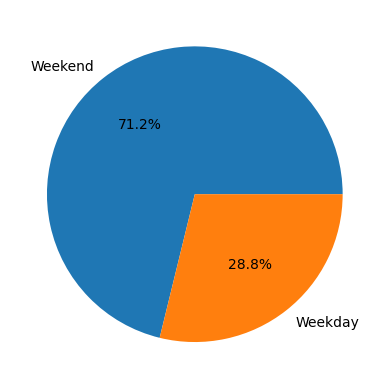

In [227]:
# pie chart of day of the week day orders are placed

days_order_placed = df["day_of_the_week"].value_counts()
days_order_placed_percentage = (days_order_placed/days_order_placed.sum())*100
print(days_order_placed_percentage)
plt.pie(days_order_placed_percentage, labels=days_order_placed_percentage.index,autopct="%1.1f%%")

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [228]:
# Write the code here

# Calculate the total number of orders by each restaurant
restaurant_orders = df.groupby("restaurant_name")["restaurant_id"].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = restaurant_orders.head(5)
#print(top_5_restaurants)
# Print the top 5 restaurants and their order counts
print(f"The top 5 restaurants with their order counts are:\n")
for restaurant, order_count in top_5_restaurants.items():
    print(f"{restaurant}: {order_count}")

The top 5 restaurants with their order counts are:

Shake Shack: 219
The Meatball Shop: 132
Blue Ribbon Sushi: 119
Blue Ribbon Fried Chicken: 96
Parm: 68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [229]:
# Write the code here
weekend_orders_df = df[df["day_of_the_week"].isin(["Weekend"])]
weekend_cuisine_counts = weekend_orders_df.groupby("cuisine_type")["day_of_the_week"].count().sort_values(ascending=False)
print(f"The most popular cuisine on weekends is {weekend_cuisine_counts.index.to_list()[0]} ordered {weekend_cuisine_counts.values.tolist()[0]} times")

The most popular cuisine on weekends is American ordered 415 times


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [230]:
# Write the code here

# Calculate the number of orders costing more than $20
orders_greater_than_20_df = df[df["cost_of_the_order"] > 20].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage
percentage = (orders_greater_than_20_df / total_orders) * 100

print(f"{percentage:.2f}% of orders cost more than $20")

29.24% of orders cost more than $20


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [231]:
# Write the code here

mean_delivery_time = round(df["delivery_time"].mean(),2)
print(f"Mean order delivery time is {mean_delivery_time} minutes")

Mean order delivery time is 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [232]:
# Write the code here

# Group the DataFrame by "customer_id" and count orders
customer_orders = df.groupby("customer_id")["order_id"].count().sort_values(ascending=False)

# Get the top 3 customer IDs
top_3_customer_ids = customer_orders.head(3)
#print(top_3_customer_ids)

# Print the results
for customer_id, order_count in top_3_customer_ids.items():
  print(f"Customer ID: {customer_id}, Number of Orders: {order_count}")

Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Restaurant: Shake Shack, Total Revenue: 3579.53, Order Count: 219.0, Average Order: 16.34
Restaurant: The Meatball Shop, Total Revenue: 2145.21, Order Count: 132.0, Average Order: 16.25
Restaurant: Blue Ribbon Sushi, Total Revenue: 1903.95, Order Count: 119.0, Average Order: 16.0
Restaurant: Blue Ribbon Fried Chicken, Total Revenue: 1662.29, Order Count: 96.0, Average Order: 17.32
Restaurant: Parm, Total Revenue: 1112.76, Order Count: 68.0, Average Order: 16.36


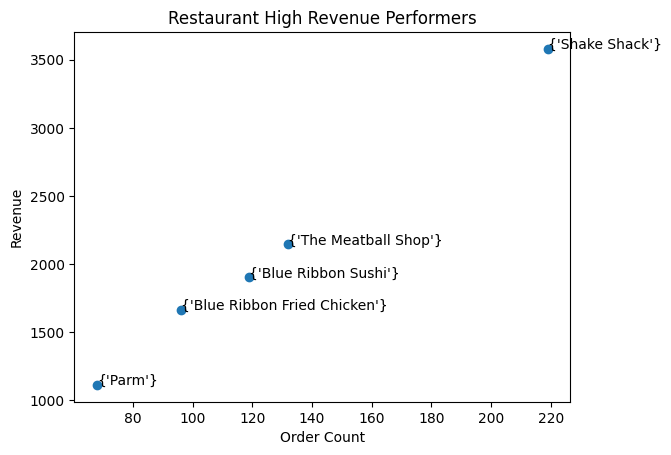

In [240]:
# Write the code here
# Top 5 restaurants (high revenue performers) with order count and highest aggregate revenue and a scatter plot

# Group the DataFrame by "restaurant_name" and calculate sum of "cost_of_the_order" and count of "order_id"
restaurant_revenue = df.groupby("restaurant_name").agg(
    total_revenue=pd.NamedAgg(column="cost_of_the_order", aggfunc="sum"),
    order_count=pd.NamedAgg(column="order_id", aggfunc="count"),
    )

restaurant_revenue["Avg_revenue_per_order"]=restaurant_revenue["total_revenue"]/restaurant_revenue["order_count"]

# Sort top 5 restaurants by total_revenue in descending order
restaurant_revenue = restaurant_revenue.sort_values(by="total_revenue", ascending=False)
#restaurant_revenue.info()

# Get the top 5 restaurants
top_5_restaurants = restaurant_revenue.head(5)

for i, row in top_5_restaurants.iterrows():
  print(f"Restaurant: {i}, Total Revenue: {str(row['total_revenue'])}, Order Count: {str(row['order_count'])}, Average Order: {str(round(row['Avg_revenue_per_order'],2))}")

# Create a scatter plot
plt.scatter(top_5_restaurants["order_count"], top_5_restaurants["total_revenue"])

# Add labels for each restaurant
for i, row in top_5_restaurants.iterrows():
    plt.annotate({i}, (row["order_count"], row["total_revenue"]))

# Add axis labels and title
plt.xlabel("Order Count")
plt.ylabel("Revenue")
plt.title("Restaurant High Revenue Performers")

plt.show()


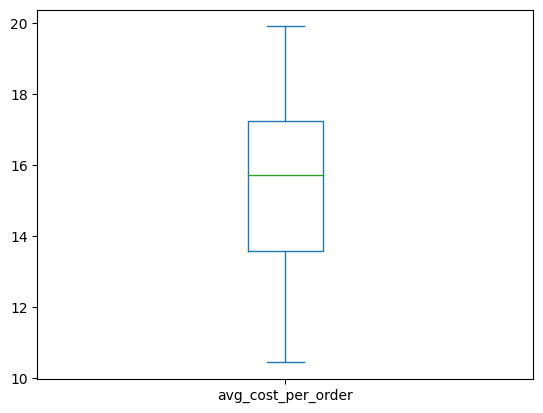

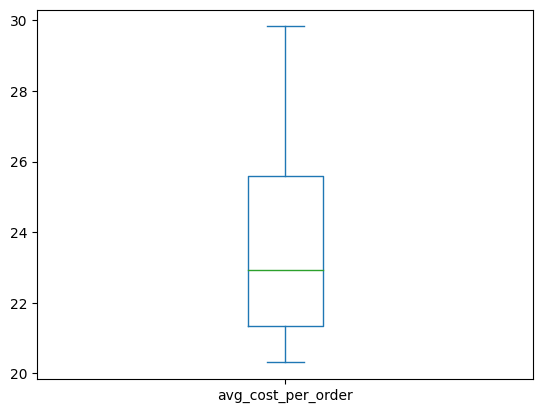

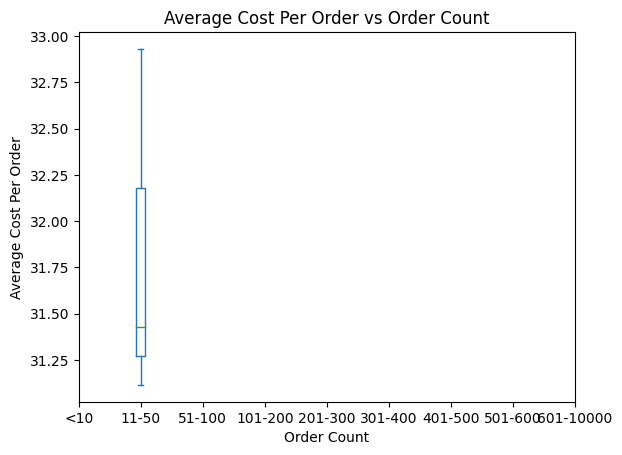

In [239]:
# Corelation of average order cost ranges with order count with a box plot

# Group the DataFrame by "restaurant_name" and calculate sum of "cost_of_the_order" and count of "order_id"
df_average_order_cost = df.groupby("restaurant_name").agg(
    total_revenue=pd.NamedAgg(column="cost_of_the_order", aggfunc="sum"),
    order_count=pd.NamedAgg(column="order_id", aggfunc="count"),
    )

df_average_order_cost["avg_cost_per_order"]=df_average_order_cost["total_revenue"]/df_average_order_cost["order_count"]

# Sort top 5 restaurants by total_revenue in descending order
df_average_order_cost = df_average_order_cost.sort_values(by="avg_cost_per_order", ascending=False)
#df_average_order_cost.head()

# Break the average cost in ranges (<$10, $11-$20, $21-$30, $31-$40)
df_avg_cost_ranges = df_average_order_cost.groupby(pd.cut(df_average_order_cost["avg_cost_per_order"], bins=[10, 20, 30, 40]))
#df_avg_cost_ranges.head()

#Draw a box plot
df_avg_cost_ranges.plot(kind="box", x="order_count", y="avg_cost_per_order")
plt.xticks(ticks=range(order_count), labels=["<10", "11-50", "51-100", "101-200","201-300", "301-400", "401-500", "501-600", "601-10000" ])
# Add title and labels
plt.title("Average Cost Per Order vs Order Count")
plt.xlabel("Order Count")
plt.ylabel("Average Cost Per Order")

plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---